<!--NAVIGATION-->
< [16.3 Least Squares Regression Derivation (Multivariable Calculus)](chapter16.03-Least-Squares-Regression-Derivation-Multivariable-Calculus.ipynb)  | [Contents](Index.ipynb) | [16.5 Least Square Regression for Nonlinear Functions](chapter16.05-Least-Square-Regression-for-Nonlinear-Functions.ipynb)    >

# Least Squares Regression in Python

Recall that if we enumerate the estimation of the data at each data point, $x_i$, this gives us the following system of equations:

\begin{eqnarray*}
&&\hat{y}(x_1) = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n f_n(x_1),\\
&&\hat{y}(x_2) = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n f_n(x_2),\\
&&\qquad\qquad\qquad\qquad\qquad \cdots\\
&&\hat{y}(x_m) = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).
\end{eqnarray*}

If the data was absolutely perfect (i.e., no noise), then the estimation function would go through all the data points, resulting in the following system of equations:

\begin{eqnarray*}
&&y_1 = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n
f_n(x_1),\\
&&y_2 = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n
f_n(x_2),\\
&&\qquad\qquad\qquad\qquad\cdots\\
&&y_m = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).
\end{eqnarray*}

If we take $A$ to be as defined previously, this would result in the matrix equation
$$
Y = A{\beta}.
$$

However, since the data is not perfect, there will not be an estimation function that can go through all the data points, and this system will have $\textit{no solution}$. Therefore, we need to use the least square regression that we derived in the previous two sections to get a solution. 

$${\beta} = (A^T A)^{-1} A^T Y$$

**TRY IT!** Consider the artificial data created by $\textit{x = np.linspace(0, 1, 101)}$ and $\textit{y = 1 + x + x * np.random.random(len(x))}$. Do a least squares regression with an estimation function defined by $\hat{y}=\alpha_1x+\alpha_2$. Plot the data points along with the least squares regression. Note that we expect $\alpha_1=1.5$ and $\alpha_2=1.0$ based on this data. Due to the random noise we added into the data, your results maybe slightly different.   

### Use direct inverse method

In [13]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [14]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [15]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T
# print(A)
# turn y into a column vector
y = y[:, np.newaxis]


In [16]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.46320034]
 [1.02216192]]


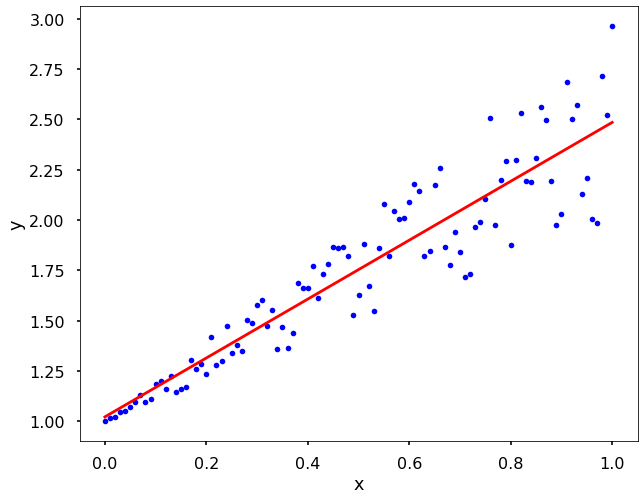

In [17]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In Python, there are many different ways to conduct the least square regression. For example, we can use packages as *numpy*, *scipy*, *statsmodels*, *sklearn* and so on to get a least square solution. Here we will use the above example and introduce you more ways to do it. Feel free to choose one you like. 

### Use the pseudoinverse

We talked before that the $(A^T A)^{-1} A^T$ is called the pseudo-inverse, therefore, we could use the *pinv* function in *numpy* to directly calculate it. 

In [18]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.46320034]
 [1.02216192]]


### Use numpy.linalg.lstsq

Actually, *numpy* has already implemented the least square methods that we can just call the function to get a solution. The function will return more things than the solution itself, please check the documentation for details. 

In [19]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.46320034]
 [1.02216192]]


### Use optimize.curve_fit from scipy

This scipy function is actually very powerful, that it can fit not only linear functions, but many different function forms, such as non-linear function. Here we will show the linear example from above. Note that, using this function, we don't need to turn y into a column vector. 

In [20]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [21]:
def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.4351161  1.03732604]


In [11]:
import numpy as np
import statsmodels.api as sm
import torch
import pandas as pd

N = 200 # Trainingszeilen (historical data)
c_new = 4

# x{k in 0..24, i in 0..N} default if k=0 then 1 else round(np.random.uniform(0, 20)) # historical/training data
x = np.array([[ (1 if k == 0 else np.round(np.random.uniform(0, 20))) for k in range(N)] for _ in range(25)]) # historical/training data


# own period: 1st half: own x[7, i]vs x[2, i]| 2nd half: own x[7, i] vs x[2, i+1] 
# comp period: 1st half: com x[2, i-1] vs x[7, i-1] | 2nd half: com x[2, i-1] vs x[7, i] 

for i in range(1, N):
	x[1, i] = x[1, i-1]-x[12, i-1]+x[13, i-1]  # inventory own

	x[2, i] = x[7, i-1]-1 + np.round_(x[5, i-1]/200) if 9 < x[7, i-1] <= 20 else 20  # comp price new
	x[3, i] = x[8, i-1]-1 + np.round_(x[5, i-1]/200) if 5 < x[8, i-1] <= 15 else 15  # comp price used
	x[4, i] = x[9, i-1]-0.5-np.round_(x[5, i-1]/200)if 1 < x[9, i-1] <= 5 else 5  # comp price rebuy
	x[5, i] = x[5, i-1]-x[16, i-1] + x[17, i - 1]  # comp inventory
	x[6, i] = max(0, np.round_(0.8*x[6, i-1])+x[11, i-1]+x[12, i-1]-x[13, i-1] + x[15, i-1] + x[16, i-1]-x[17, i-1])  # resource in use

	x[7, i] = np.round_(np.random.uniform(5, 20)) if i < 20 else x[2, i] - 1 + np.round_(x[1, i]/200)if 9 < x[2, i] <= 18 else 18  # own price new
	x[8, i] = np.round_(np.random.uniform(0, 20)) if i < 20 else x[3, i] - 1 + np.round_(x[1, i]/200)if 5 < x[3, i] <= 12 else 12  # own price used
	x[9, i] = np.round_(np.random.uniform(0, 10)) if i < 20 else x[4, i]-0.5-np.round_(x[1, i]/200)if 1 < x[4, i] <= 5 else 5  # own price rebuy
	x[10, i] = x[1, i]*0.05  # own holding cost
	x[22, i] = x[7, i]-1+np.round_(x[5, i]/200) if 9 < x[7, i] <= 20 else 20  # comp new reaction
	x[23, i] = x[8, i]-1+np.round_(x[5, i]/200) if 5 < x[8, i] <= 15 else 15  # comp used reaction
	x[24, i] = x[9, i]-0.5 - np.round_(x[5, i]/200) if 1 < x[9, i] <= 5 else 5  # comp rebuy reaction
	x[11, i] = np.round_(max(0, np.random.uniform(5, 15)-x[7, i] + x[2, i]/4 + x[22, i]/4))  # own sales new
	x[12, i] = np.round_(min(x[1, i],  max(0, np.random.uniform(5, 15)-x[8, i] + x[3, i]/4 + x[23, i]/4)))  # own sales used
	x[13, i] = np.round_(min(x[6, i]/2, max(0, np.random.uniform(5, 15)+x[9, i] - x[4, i]/4 - x[24, i]/4)))  # own repurchases
	x[14, i] = x[5, i]*0.05  # comp holding cost
	x[15, i] = np.round_(max(0, np.random.uniform(5, 15)-x[2, i] + x[7, i]/4 + x[7, i-1]/4))  # comp sales new
	x[16, i] = np.round_(min(x[5, i],  max(0, np.random.uniform(5, 15)-x[3, i] + x[8, i]/4 + x[8, i-1]/4)))  # comp sales used
	x[17, i] = np.round_(min(x[6, i]/2, max(0, np.random.uniform(5, 15)+x[4, i] - x[9, i]/4 - x[9, i-1]/4)))  # comp repurchases

	x[18, i] = -x[10, i] + x[11, i]*(x[7, i]-c_new) + x[12, i]*x[8, i] - x[13, i]*x[9, i]  # own total rewards
	x[19, i] = -x[14, i] + x[15, i]*(x[2, i]-c_new) + x[16, i]*x[3, i] - x[17, i]*x[4, i]  # comp total rewards
	x[20, i] = x[18, i] + x[20, i-1] if i > 0 else 0  # own total accumulated rewards
	x[21, i] = x[19, i] + x[21, i-1] if i > 0 else 0  # comp total accumulated rewards

print("x:", x)
print("x.size", x.size)

x_df = pd.DataFrame(x)
x_df.to_csv("x_first_prototype.csv")
# for {i in range(1, n):
# x[1, i] = x[1, i-1]-x[12, i-1]+x[13, i-1] # inventory own

# x[2, i] = if 9<x[7, i-1]<=20 then x[7, i-1]-1 +round(x[5, i-1]/200) else 20 # comp price new
# x[3, i] = if 5<x[8, i-1]<=15 then x[8, i-1]-1 +round(x[5, i-1]/200) else 15 # comp price used
# x[4, i] = if 1<x[9, i-1]<= 5 then x[9, i-1]-0.5-round(x[5, i-1]/200) else 5 # comp price rebuy
# x[5, i] = x[5, i-1]-x[16, i-1]+x[17, i-1]# comp inventory
# x[6, i] = max(0, round(0.8*x[6, i-1])+x[11, i-1]+x[12, i-1]-x[13, i-1]+x[15, i-1]+x[16, i-1]-x[17, i-1]) # resource in use
# x[7, i] = if i<20 then round(np.random.uniform(5, 20)) else if 9<x[2, i]<=18 then x[2, i]-1 +round(x[1, i]/200) else 18 # own price new
# x[8, i] = if i<20 then round(np.random.uniform(0, 20)) else if 5<x[3, i]<=12 then x[3, i]-1 +round(x[1, i]/200) else 12 # own price used
# x[9, i] = if i<20 then round(np.random.uniform(0, 10)) else if 1<x[4, i]<= 5 then x[4, i]-0.5-round(x[1, i]/200) else 5 # own price rebuy
# x[10, i]= x[1, i]*0.05# own holding cost
# x[22, i]= if 9<x[7, i]<=20 then x[7, i]-1+round(x[5, i]/200) else 20 # comp new reaction
# x[23, i]= if 5<x[8, i]<=15 then x[8, i]-1+round(x[5, i]/200) else 15 # comp used reaction
# x[24, i]= if 1<x[9, i]<= 5 then x[9, i]-0.5 -round(x[5, i]/200) else 5 # comp rebuy reaction
# x[11, i]= round(max(0, np.random.uniform(5, 15)-x[7, i] +x[2, i]/4 +x[22, i]/4 )) # own sales new
# x[12, i]= round(min(x[1, i],  max(0, np.random.uniform(5, 15)-x[8, i] +x[3, i]/4 +x[23, i]/4))) # own sales used
# x[13, i]= round(min(x[6, i]/2, max(0, np.random.uniform(5, 15)+x[9, i] -x[4, i]/4 -x[24, i]/4))) # own repurchases
# x[14, i]= x[5, i]*0.05# comp holding cost
# x[15, i]= round(max(0, np.random.uniform(5, 15)-x[2, i] +x[7, i]/4 +x[7, i-1]/4 )) # comp sales new
# x[16, i]= round(min(x[5, i],  max(0, np.random.uniform(5, 15)-x[3, i] +x[8, i]/4 +x[8, i-1]/4 ))) # comp sales used
# x[17, i]= round(min(x[6, i]/2, max(0, np.random.uniform(5, 15)+x[4, i] -x[9, i]/4 -x[9, i-1]/4 ))) # comp repurchases

# x[18, i]= -x[10, i] +x[11, i]*(x[7, i]-c_new) +x[12, i]*x[8, i] -x[13, i]*x[9, i] # own total rewards
# x[19, i]= -x[14, i] +x[15, i]*(x[2, i]-c_new) +x[16, i]*x[3, i] -x[17, i]*x[4, i] # comp total rewards
# x[20, i]= x[18, i]+ if i>0 then x[20, i-1] # own total accumulated rewards
# x[21, i]= x[19, i]+ if i>0 then x[21, i-1] # comp total accumulated rewards




x: [[  1.  19.   9. ...   7.  10.   7.]
 [  1.   1.   2. ... 204. 202. 204.]
 [  1.  20.   9. ...  16.  16.  16.]
 ...
 [  1.   9.   9. ...  16.  16.  16.]
 [  1.  15.  14. ...   6.   6.   6.]
 [  1.   5.   5. ...   2.   5.   2.]]
x.size 5000


In [18]:
########  OLS y1 (own sales new)

y1 = [x[11,i] for i in range(N)]
# print("y1:", y1)
y1_df = pd.DataFrame(y1)
y1_df.to_csv("y1_first_prototype.csv")
M1 = (0,1,2,3,4,7,8,9,22,23,24)
# param b1 {k in M1} default 0
b1 = np.zeros(len(M1))
# var beta1 {k in M1}
# beta1 = somehow do the beta error
x_y1 = x[M1,:]

# print(x_y1)
# minimize OLSy1: sum{i in 1..N} ( sum{k in M1} beta1[k]*x[k,i] - y1[i] )^2
# ols_y1 = np.sum((np.dot(b1[M1], x[M1,:]) - y1)**2) #########################################################################
# y1_t = torch.tensor(y1)

# y_y1_t = torch.tensor(x_y1
# print(y1_t.dim())
# x_y1i = torch.transpose(y1_t, -1, 0)
# y1_t1 = y1_t[:, np.newaxis]


# print("y1_t:", y1_t.size())
# print("x_y1:", x_y1)
# print("alpha:", alpha)
transposed_tensor_x_y1 = torch.tensor(x_y1).transpose(0,1)
tensor_y1 = torch.tensor(y1)
result_tuple_y1 = torch.linalg.lstsq(transposed_tensor_x_y1, tensor_y1, driver='gels')
print("result:", result_tuple_y1)
# objective OLSy1 solve for{k in M1}   b1[k] = beta1[k]

tensor_b = result_tuple_y1[0]
print(torch.dist(torch.dot(tensor_b, transposed_tensor_x_y1[0]), tensor_y1)/len(tensor_y1))


result: torch.return_types.linalg_lstsq(
solution=tensor([ 0.0099, -0.0075,  0.4393, -0.0702,  0.2657, -0.8721,  0.2016, -0.0714,
         0.4435,  0.2130,  0.2051], dtype=torch.float64),
residuals=tensor([1124.7614], dtype=torch.float64),
rank=tensor([], dtype=torch.int64),
singular_values=tensor([], dtype=torch.float64))
tensor(0.2615, dtype=torch.float64)


In [10]:
########  OLS y2 (own sales used)

y2 = [x[12,i] for i in range(N)]
M2 = (0,1,2,3,4,7,8,9,22,23,24)
x_y2 = x[M2,:]

# print("y2:", y2)
# y2_df = pd.DataFrame(y2)
# y2_df.to_csv("y2_first_prototype.csv")
# param b1 {k in M1} default 0
# b2 = np.zeros(len(M2))
# var beta1 {k in M1}
# beta1 = somehow do the beta error

# print("x_y2:", x_y2)


# param y2 {i in 1..N} := x[12,i];
# set M2 := {0,1,2,3,4,7,8,9,22,23,24};
# param b2 {k in M2} default 0;
# var beta2 {k in M2};

transposed_tensor_x_y2 = torch.tensor(x_y2).transpose(0,1)
tensor_y2 = torch.tensor(y2)
result_tuple_y2 = torch.linalg.lstsq(transposed_tensor_x_y2, tensor_y2)
print("result:", result_tuple_y2)

# minimize OLSy2: sum{i in 1..N} ( sum{k in M2} beta2[k]*x[k,i] - y2[i] )^2;
# objective OLSy2; solve; for{k in M2} let b2[k]:=beta2[k];;

result: torch.return_types.linalg_lstsq(
solution=tensor([ 1.3489e-01, -8.2808e-05,  2.5466e-01,  5.5608e-02,  2.1862e-01,
         1.3064e-02, -4.8307e-01,  3.3273e-01,  2.6617e-01, -2.3580e-01,
         1.3403e-01], dtype=torch.float64),
residuals=tensor([], dtype=torch.float64),
rank=tensor(11),
singular_values=tensor([], dtype=torch.float64))


In [7]:
########  OLS y3 (own purchases rebuy)

y3 = [x[13,i] for i in range(N)]
M3 = (0,1,2,3,4,7,8,9,22,23,24)
x_y3 = x[M3,:]

# param y3 {i in 1..N} := x[13,i];
# set M3 := {0,1,2,3,4,7,8,9,22,23,24};
# param b3 {k in M3} default 0;
# var beta3 {k in M3};

transposed_tensor_x_y3 = torch.tensor(x_y3).transpose(0,1)
tensor_y3 = torch.tensor(y3)
result_tuple_y3 = torch.linalg.lstsq(transposed_tensor_x_y3, tensor_y3)
print("result:", result_tuple_y3)

# minimize OLSy3: sum{i in 1..N} ( sum{k in M3} beta3[k]*x[k,i] - y3[i] )^2;
# objective OLSy3; solve; for{k in M3} let b3[k]:=beta3[k];;

result: torch.return_types.linalg_lstsq(
solution=tensor([ 9.7768e-02, -1.8974e-04, -1.5960e-02, -2.6504e-01,  4.0468e-01,
         2.0996e-01,  1.1694e-01,  1.0918e-01,  1.4732e-01, -3.8088e-02,
         3.4200e-01], dtype=torch.float64),
residuals=tensor([], dtype=torch.float64),
rank=tensor(11),
singular_values=tensor([], dtype=torch.float64))


In [ ]:
########  OLS y4 (price comp new)

y4 = [x[2,i+1] for i in range(1, N-1)]
M4 = (0,2,3,4,7,8,9)
M4x = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)

x4 = [1 if x[7,i] < k else 0 for k in range(1, N-1)]


# param y4 {i in 1..N-1} := x[2,i+1]; # x22
# set M4 := {0,2,3,4,7,8,9};
# set M4x:= 1..20;
# param x4 {k in M4x,i in 1..N-1} := if x[7,i]<k then 1 else 0;
# param b4 {k in M4} default 0;
# param b4x{k in M4x} default 0;
# var beta4 {k in M4};
# var beta4x{k in M4x};

# minimize OLSy4: sum{i in 1..N-1} ( sum{k in M4}  beta4[k] *x[k,i] 
#                                  + sum{k in M4x} beta4x[k]*x4[k,i] - y4[i] )^2;
# objective OLSy4; solve; for{k in M4}  let b4[k]:=beta4[k];;
#                         for{k in M4x} let b4x[k]:=beta4x[k];;

In [ ]:
###########  Simulation in Modell B   ###############

NB = N

# param xb{k in 0..24,i in 0..NB} default if k=0 then 1 else if i=0 then 5 else -1; # simulated data

xb = np.array([[ (1 if k == 0 else 5 if i == 0 else -1) for k in range(N)] for _ in range(25)])

for {i in range(1,NB):
     xb[1,i] := xb[1,i-1]-xb[12,i-1]+xb[13,i-1];
   let xb[2,i] := sum{k in M4}  b4[k] *xb[k,i-1] 
                + sum{k in M4x} b4x[k]*(if xb[7,i-1]<k then 1 else 0);
   let xb[3,i] := sum{k in M5}  b5[k] *xb[k,i-1] 
                + sum{k in M5x} b5x[k]*(if xb[8,i-1]<k then 1 else 0);
   let xb[4,i] := sum{k in M6}  b6[k] *xb[k,i-1] 
                + sum{k in M6x} b6x[k]*(if xb[9,i-1]<k then 1 else 0);
   let xb[5,i] := xb[5,i-1]-xb[16,i-1]+xb[17,i-1];;
   let xb[6,i] := max(0,round(0.8*xb[6,i-1])+xb[11,i-1]+xb[12,i-1]-xb[13,i-1]+xb[15,i-1]+xb[16,i-1]-xb[17,i-1]);;   
   let xb[7,i] := if 9<xb[2,i]<=18 then xb[2,i]-1  +round(x[1,i]/200) else 18;   
   let xb[8,i] := if 5<xb[3,i]<=12 then xb[3,i]-1  +round(x[1,i]/200) else 12;   
   let xb[9,i] := if 1<xb[4,i]<= 5 then xb[4,i]-0.5-round(x[1,i]/200) else  5;   
   let xb[10,i]:= xb[1,i]*0.05;
   let xb[22,i]:= sum{k in M4}  b4[k] *xb[k,i] 
                + sum{k in M4x} b4x[k]*(if xb[7,i]<k then 1 else 0);
   let xb[23,i]:= sum{k in M5}  b5[k] *xb[k,i] 
                + sum{k in M5x} b5x[k]*(if xb[8,i]<k then 1 else 0);
   let xb[24,i]:= sum{k in M6}  b6[k] *xb[k,i] 
                + sum{k in M6x} b6x[k]*(if xb[9,i]<k then 1 else 0);
   let xb[11,i]:= round(max(0,             Uniform(-5,5) + sum{k in M1} b1[k]*xb[k,i]));
   let xb[12,i]:= round(min(x[1,i],  max(0,Uniform(-5,5) + sum{k in M2} b2[k]*xb[k,i])));
   let xb[13,i]:= round(min(x[6,i]/2,max(0,Uniform(-5,5) + sum{k in M3} b3[k]*xb[k,i])));
   let xb[14,i]:= xb[5,i]*0.05; 
   let xb[15,i]:= round(max(0,             Uniform(-5,5) + b1[0]*xb[0,i] + b1[1]*xb[5,i] + b1[2]*xb[7,i-1] + b1[3]*xb[8,i-1] + b1[4]*xb[9,i-1]
                                                                                         + b1[7]*xb[2,i]   + b1[8]*xb[3,i]   + b1[9]*xb[4,i]
                                                                                         + b1[22]*xb[7,i]  + b1[23]*xb[8,i]  + b1[24]*xb[9,i]  )); # cf M1
																						 
   let xb[16,i]:= round(min(x[5,i],  max(0,Uniform(-5,5) + b2[0]*xb[0,i] + b2[1]*xb[5,i] + b2[2]*xb[7,i-1] + b2[3]*xb[8,i-1] + b2[4]*xb[9,i-1]
                                                                                         + b2[7]*xb[2,i]   + b2[8]*xb[3,i]   + b2[9]*xb[4,i]
                                                                                         + b2[22]*xb[7,i]  + b2[23]*xb[8,i]  + b2[24]*xb[9,i] ))); # cf M2
																						 
   let xb[17,i]:= round(min(x[6,i]/2,max(0,Uniform(-5,5) + b3[0]*xb[0,i] + b3[1]*xb[5,i] + b3[2]*xb[7,i-1] + b3[3]*xb[8,i-1] + b3[4]*xb[9,i-1]
                                                                                         + b3[7]*xb[2,i]   + b3[8]*xb[3,i]   + b3[9]*xb[4,i]
                                                                                         + b3[22]*xb[7,i]  + b3[23]*xb[8,i]  + b3[24]*xb[9,i] ))); # cf M3 
   let xb[18,i]:= -xb[10,i]+xb[11,i]*(xb[7,i]-c_new)+xb[12,i]*xb[8,i]-xb[13,i]*xb[9,i]; # own total rewards
   let xb[19,i]:= -xb[14,i]+xb[15,i]*(xb[2,i]-c_new)+xb[16,i]*xb[3,i]-xb[17,i]*xb[4,i]; # comp total rewards
   let xb[20,i]:= xb[18,i]+ if i>0 then xb[20,i-1];                # own total accumulated rewards
   let xb[21,i]:= xb[19,i]+ if i>0 then xb[21,i-1];                # comp total accumulated rewards   


<!--NAVIGATION-->
< [16.3 Least Squares Regression Derivation (Multivariable Calculus)](chapter16.03-Least-Squares-Regression-Derivation-Multivariable-Calculus.ipynb)  | [Contents](Index.ipynb) | [16.5 Least Square Regression for Nonlinear Functions](chapter16.05-Least-Square-Regression-for-Nonlinear-Functions.ipynb)    >